# **Adventure Work Analysis **



# **INTRODUCTION**

# The Company: Adventure Works Company 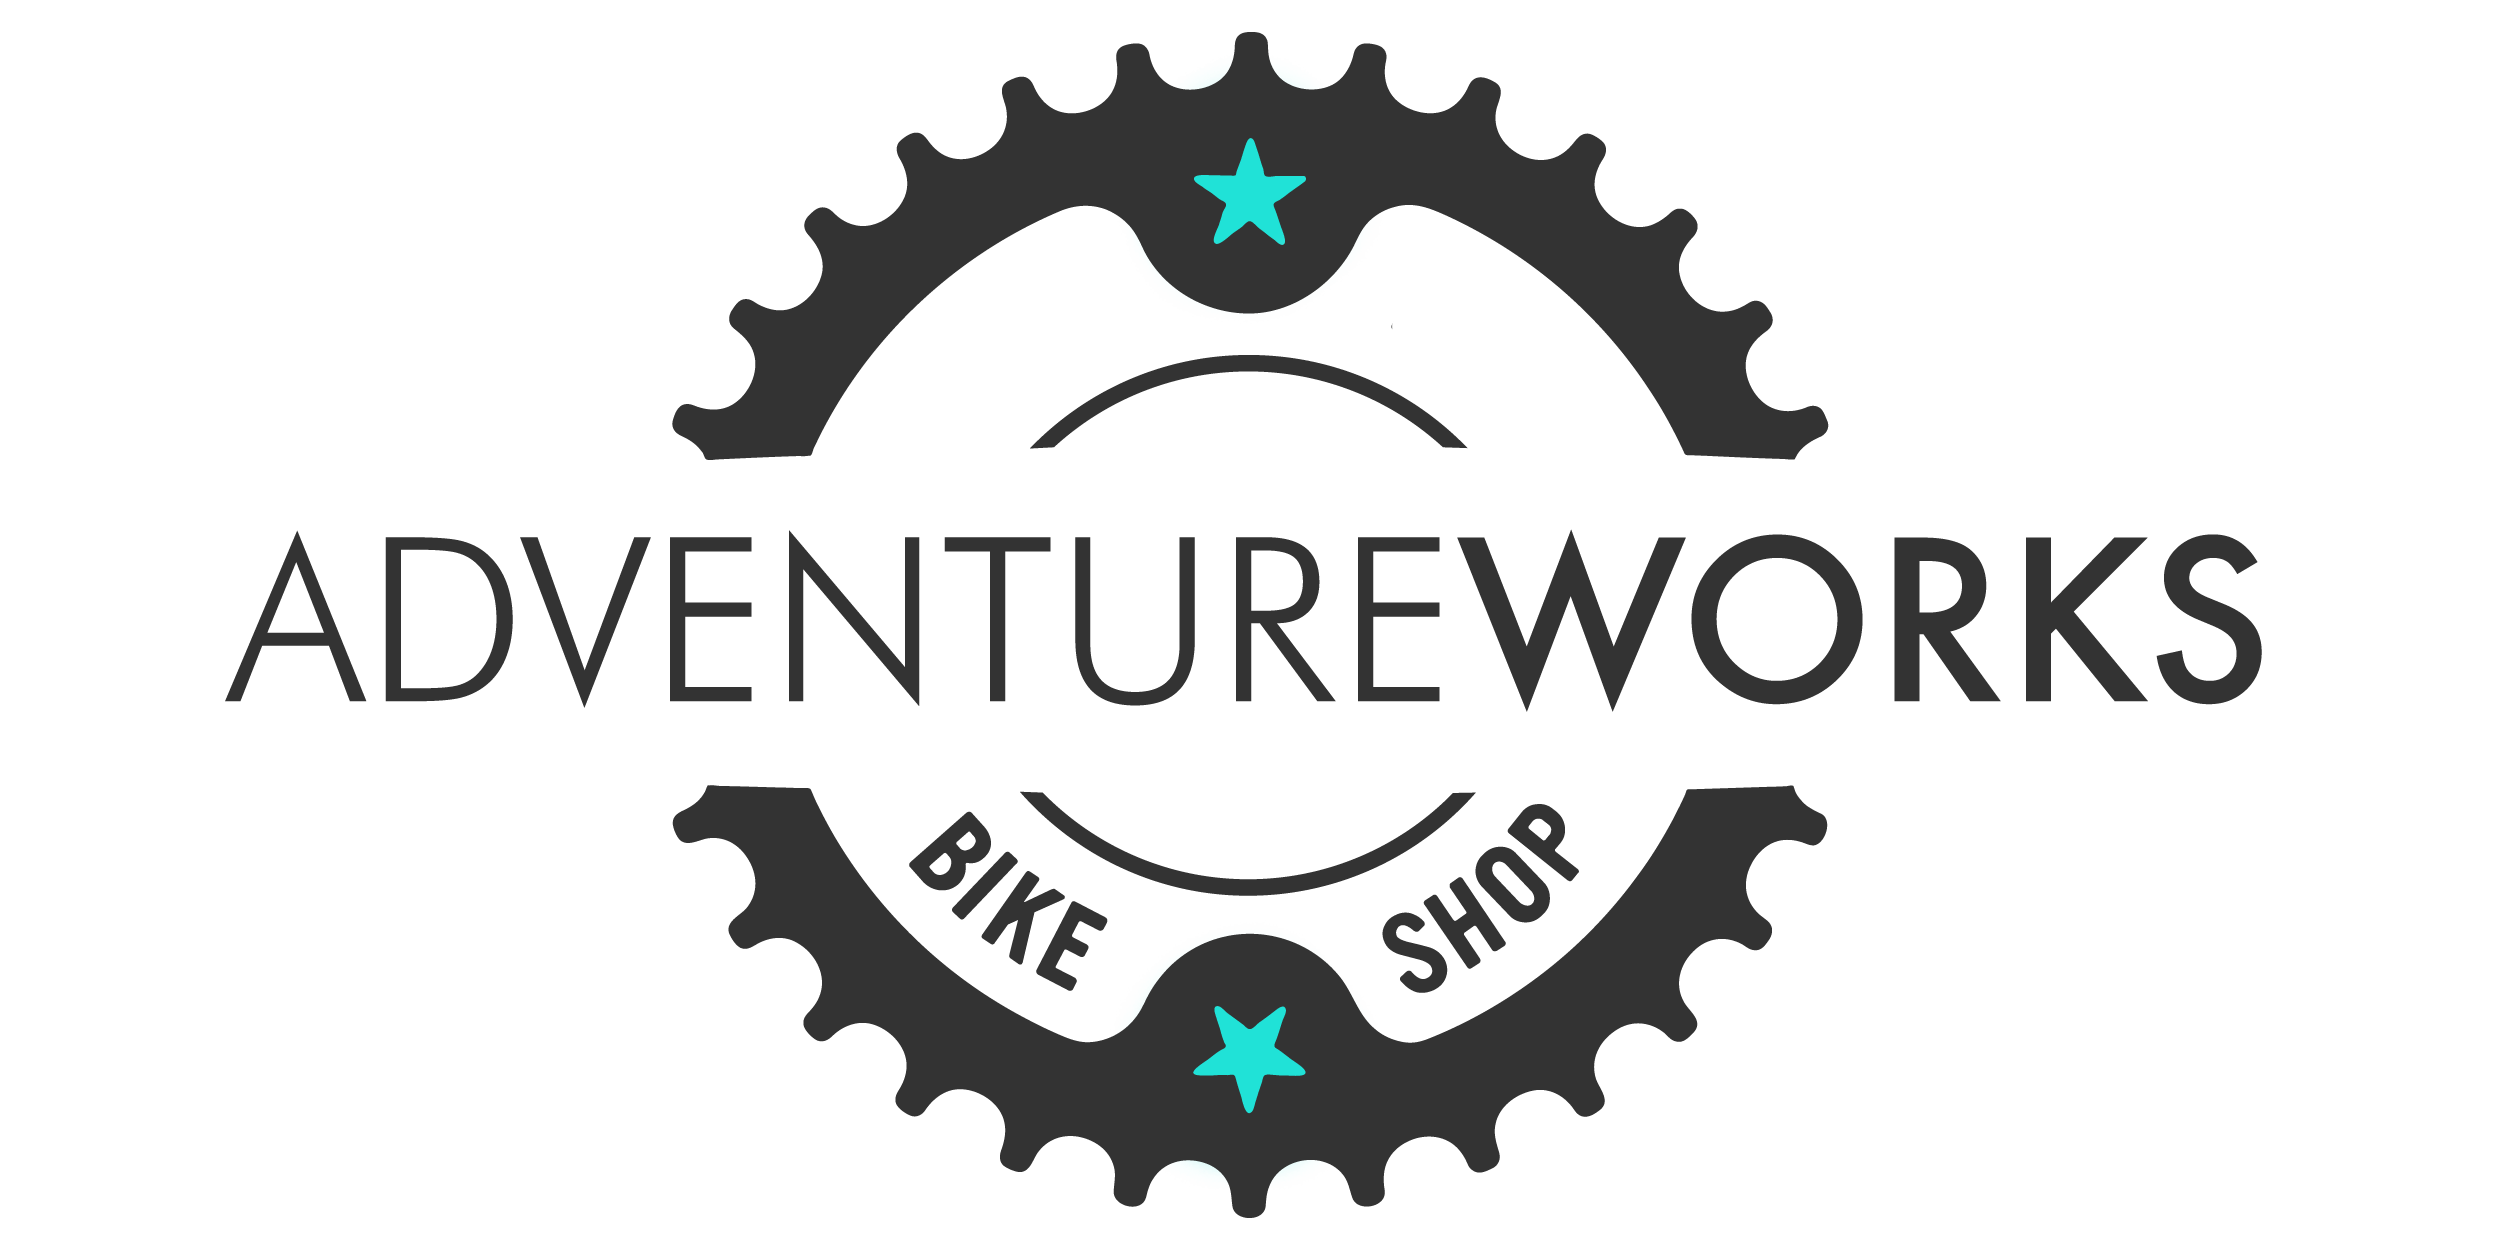

In 1992, Adventure Works started with hand crafted surf gear created with sustainable practices with a focus on local and regional material sourcing.  Five years later in 1997, Adventure Works had expanded beyond surf gear into many top sporting categories focusing on consistent product quality and we introduced our planet give back programme.  

Adventure Works has globally expanded with over 100 retail stores and web sites in many world markets.  We thank our customers for their support and helping us grow!


# **The Project:**

The aim of this project is to analyse the activities of the company between the year 2020-2022. This is focused on different categores discussed below to ensure increased revenue/profit generation, improved customers satisfaction and reduced return rate. The analysis has been done using the below parameters:

##

-  The Revenue/Profit generation by products category, territory and Year: To help understand where we are doing and where improvements are necessary. 
-  The Highest grossing customer: This would help in understanding our customers as it is only when we udnerstand them taht we can provide them with unmatched customer satisfaction taht would eventually improve our bottomlines
-  The return rate: High return would mean defective products or lack of customers' fulfillment and eventual loss of revenue. This analysis will give an insight into the products with the highest retune, and this could help in identifying any undetected issue in the product production.

##  **The Dataset**

The dataset contains the sales and return tables between the year 2020-2022. Both tables contains the measurable information ablot the company such as sales, orderd quantity, and quantity returned. It also has the dimension tables calendar, customers, product, product categories, product subcategories and Territory.

## **The Business Questions to be Addressed**

-  The yearly revenue and profits for the year under review: This is important to understand the year on year trend and to identify any sign of revenue/profit decline and to take immediate action in case of any sign of deterioration.
-  The monthly revenue to show the trend: This helps to understand the months seaons and the products that sell fasts in each periods.
-  The highest grossing product category by total order, total revenue and total profit: This will be used for the evaluation of each products category and to establish which product line brings in the highest revenue/profit for additioanl investment and if products should be discountinued if any.
-  The highest grossing customers by revenue and profits: This helps in customer segmentation. Knowing the highest grossing customer can help in prioritsing our customers in other to serve them better. This categories of customer, when identified can help to understand areas of improvement so as to retain them and to also device means to market low grossing customers.
-  The highest grossing Territory: This will be important for marketing strategies to identify territories that are performing well and those below expectation.
-  Return rate: This is used to dientify the highest returned product and to identify reason for such return. Could they be due to product defects or issues with the product production process.




## Data Source(s)

[AdeventureWorks](https://www.adventure-works.com/business/en-in/our-story)




## **Steps to Mart Creation**

After obtaining the data to be used for my analysis, the next step is to create the mart using T-SQL against a MS SQl server 2022.

- **Database**: The database table is firstly created to warehouse all the data to be used for this project. For this project the database table is named Project.

##  Schemas

Schmas are important in SQL to ensure data security, organization and management. It allows for the logical categorization of related databases. e.g facts tables, dims and stg. For this project, the schemas stg, dim and f for facts were created. After the creation of each schemas, refesh the database and the created schemas are located in the security folder in the database.

- **Stg**
- **fact**
- **dim**

```sql
IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'stg' ) --Using the database, this is an instruction to search in sys.schemas if a schame named named stg exists, then if not exist to begin to create
BEGIN  -- This is an instruction to start the creation process
	EXEC sp_executesql N'CREATE SCHEMA stg AUTHORIZATION dbo;'--This is used to execute the sql statement noting the stg should be created as a schema, and dbo as the owner of the schmema
END -- Though optional, but important in this case as we have started the command with begin
;

GO

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'dim' ) --Using the database, this is an instruction to search in sys.schemas if a schame named named dim exists, then if not exist to begin to create
BEGIN -- This is an instruction to start the creation process
	EXEC sp_executesql N'CREATE SCHEMA dim AUTHORIZATION dbo;'
END -- Though optional, but important in this case as we have started the command with begin
;

GO

IF NOT EXISTS (SELECT * FROM sys.schemas WHERE name = 'f' ) ----Using the database, this is an instruction to search in sys.schemas if a schame named named f exists, then if not exist to begin to create it
BEGIN ---- This is an instruction to start the creation process
	EXEC sp_executesql N'CREATE SCHEMA f AUTHORIZATION dbo;'
END -- Though optional, but important in this case as we have started the command with begin
;

GO

```
##  **Steps to Dimension Creation**

The next step would be creation of dimension table also know as dim tables. The dim tables are used in data warehouses to complement the fact tables. Dim tables warehouses descriptive attributes about business entities such as calendars, customers, products, Territories etc. seperate from transactional or numerical data. For this project the below dim tables were created:

-  **dim.Calendar:** This table is to warehouse the date of the transactions in year, month and quarterly periods. The Order date used as the primary key. 

-  dim.Customers: This table is to warehouse the customer information such as name, occupation, income level etc. The customer key is assigned as the primary key.
-  dim.Products: This is to warehouse the products information such as productname, cost, color etc
-  dim. productsCategory: This is to warehouse the various product categories. Each product are under particular categories.
-  dim.productsSubCategory: This warehouses information about the product breakdown.
-  dim.territory: This si the territory of sales and it contains the country, region adn country of sales.

```sql
/*********************************************************/
/******************   DIM DDL   ******************/
/*********************************************************/


/*********************************************************/
/******************  Calendar Dim DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Calendar')--This is an instruction to check the existence of table name Calendar in the dim schema, then to start to create if not exist
BEGIN--The starting instruction for the creation of a table name calendar in the schema dim

CREATE TABLE dim.Calendar---Instruction to create if it does not exist and the table should be named Calendar in this instance and it should be in the earlier created  schema dim
(
 
	[OrderDate] [datetime2](0) NOT NULL,--This is the column warehousing the Orderdate with character set as datetime2(0) and then set as NOT NULL. This is important as primary key can't have NULL records
	[Year] [int] NOT NULL, --This is the year column and data type set as an integer representing the year. This is set as int because its numerical and by Not NUll means it can't be empty
	[Quarter] [int] NOT NULL, --This is set as data type integer representing the Quarter. This is as int because its numerical and by Not NUll means it can't be empty
	[Month] [int] NOT NULL, ----This is set as data type integer representing the Month. This is as int because its numerical and by Not NUll means it can't be empty
	[MonthName] [varchar](10) NOT NULL --This is data type is set as a varchar representing the MonthName. This is as varchar because the records are texts. The 10 is to indicate that the letters of the MonthName can't exceed 10 characters
);
 
	ALTER TABLE dim.Calendar--This is an instruction to change what is in the above query
	ADD CONSTRAINT PK_Calendar_Julian PRIMARY KEY([OrderDate]);-- This is to add primary key constraint named Pk_Calendar_Julian on the OrderDate column. This will ensure all OrderDates are unique.

END  
 
GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.

/*********************************************************/
/******************  Customer DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Customers')---This is an instruction to check the existence of table name Calendar in the dim schema, then to start to create if not exist
BEGIN--The starting instruction for the creation of a table name calendar in the schema dim
	
    CREATE TABLE [dim].[Customers]---The table should be named Customers in this instance and it should be in the earlier created schema dim
	
(  
	[CustomerKey] [int] NOT NULL,--This is the unique identifier column for each customer and the data type is set as an int because it is numerical, and it cannot be empty because it serves as the primary key
	[Full Name] [nvarchar](max) NOT NULL,--Customer's full name, stored as datatype nvarchar becuase it is text(nvarchar(max)), and required (NOT NULL i.e can't be empty. The lenght as no limit.
	[BirthDate] [nvarchar](max) NULL,---BirthDate Column set as nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Gender] [nvarchar](max) NULL, -----Gender Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable.The lenght as no limit.
	[EmailAddress] [nvarchar](max) NULL,---EmailAddress Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[TotalChildren] [nvarchar](25) NULL, ---TotalChildren Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The maximum lenght is 25
	[EducationLevel] [nvarchar](max) NULL,--EducationLevel Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Occupation] [nvarchar](max) NULL,--Occupation Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[HomeOwner] [nvarchar](max) NULL,--HomeOwner Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Parent] [nvarchar](max) NULL,----Parent Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Customer priority] [nvarchar](max) NULL, --Customer Priority Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Income Level] [nvarchar](max) NULL,----Income Level set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	[Education Level] [nvarchar](max) NULL,----Education Level Column set as data type nvarchar because it is text and set as Null, meaning there can be empty if the data is unavailable. The lenght as no limit.
	)
	;

	ALTER TABLE dim.Customers--This is an instruction to chnage what is in the above query
    ADD CONSTRAINT PK_Cus_Key PRIMARY KEY (CustomerKey); --Adds a primary key constraint named PK_Cus_Key on the CustomerKey column, this ensures no 2 rows has same customerkey

END;

GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.

/*********************************************************/
/******************  Product Categories DIM DDL    ******************/
/*********************************************************/
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Product_Categories')--This queries the schema to check if a table named Product_Catyegoris exists in the dim schema
BEGIN--If it does not exist, then we begin

CREATE TABLE dim.Product_Categories---Instruction to create if it does not exists. The table should be named dim.Produc_categories
(
    ProductCategoryKey int NOT NULL,-- The is the unique identifier for the ProductCategory and it will serve as the primary key. The data type is set as int as it is numerica. It is al NOT NULL as it cannot be empty
	CategoryName nvarchar(max) NOT NULL,--- This is the CategoryName and the data type is set as nvarchar as it contains texts and possibly special characters
	
);
ALTER TABLE dim.Product_Categories--This is an instruction to change what is in the above query
ADD CONSTRAINT PK_Prodcat PRIMARY KEY(ProductCategoryKey);---- This is to assign ProductCategoryKey as the Primary key

END;
GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.


/*********************************************************/
/******************  Product DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Product')--This queries the schema to check if a table named Product exists in the dim schema
BEGIN--If it does not exist, then we begin
    CREATE TABLE dim.Product--This is the instruction to create a table named product in the schema dim
(

	ProductKey int NOT NULL,--This column is the unique identifier column for the products and will serve as the primary key. The data type is set as int and NOT NULL because primary key column cannot be empty
	ProductSubcategoryKey int NOT NULL,--This column will warehouse Subcategory, necessary for the subcategory linkage. The data type is set as int and NOT NULL which means it cannot be empty
	ProductName nvarchar(max) NOT NULL,--This column will warehouse the ProductName. The data type is set as nvarchar because names can have special characters.
	ProductColor nvarchar(max) NOT NULL,--This column will warehouse the ProductColor. The data type is set as nvarchar because names can have special characters.
	ProductCost money NULL,--This column will warehouse the ProductCost. The data type is set as money because it contains currency values.
	ProductPrice money NOT NULL,--This column will warehouse the ProductPrice. The data type is set as money because it contains currency values. This si arequired field, and so set as NOT NULL
	[Discount Price] decimal NOT NULL--This column will warehouse the DiscountPrice. The data type is set as decimal because the values contain decimal points.

);

ALTER TABLE dim.Product--This is an instruction to change what is in the above query
ADD CONSTRAINT PK_Prod PRIMARY KEY(ProductKey);--This instructs to add the ProductKey as the primary key.
	

END

GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.
/*********************************************************/
/******************  Products DIM DDL   ******************/
/*********************************************************/

IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Products')--This queries the schema to check if a table named Product exists in the dim schema
BEGIN--If it does not exist, then we begin
    CREATE TABLE dim.Products--This is the instruction to create a table named Products in the schema dim
(
	ProductKey int NOT NULL,--This is the unique identifier column for the Products and will serve as the primary key. The data type is set as int and NOT NULL because primary key column cannot be empty
	ProductSubcategoryKey int NOT NULL,--This column will warehouse Subcategory, necessary for the subcategory linkage. The data type is set as int and NOT NULL which means it cannot be empty
	ProductName nvarchar(max) NOT NULL,--This column will warehouse the ProductName. The data type is set as nvarchar because names can have special characters.
	ProductColor nvarchar(max) NOT NULL,--This column will warehouse the ProductColor. The data type is set as nvarchar because names can have special characters.
	ProductCost money NULL,--This column will warehouse the ProductCost. The data type is set as money because it contains currency values.
	ProductPrice money NOT NULL,--This column will warehouse the ProductPrice. The data type is set as money because it contains currency values. This si arequired field, and so set as NOT NULL
	[Discount Price] decimal NOT NULL--This column will warehouse the DiscountPrice. The data type is set as decimal because the values contain decimal points.

);

ALTER TABLE dim.Products--This is an instruction to change what is in the above query
ADD CONSTRAINT PK_Prods PRIMARY KEY(ProductKey);--This instructs to add the ProductKey as the primary key.
	

END

GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.



/*********************************************************/
/******************  Territory DIM DDL    ******************/
/*********************************************************/
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Territory')--This queries the schema to check if a table named Territory exists in the dim schema
BEGIN--If it does not exist, then we begin


CREATE TABLE dim.Territory--This is the instruction to create a table named Territory in the schema dim
(
    TerritoryKey int NOT NULL,--This is a unique identifier column for territory, with data type int and as NOT NULL, cannot have empty calues
	Region nvarchar(max) NOT NULL,--This represents the region and the data type is nvarchar as it might contain some special character, the values cannot be empty
	Country nvarchar(max) NOT NULL,--This represents the Country and data type is nvarchar as it might contain some special character, the value
	Continent nvarchar(max) NOT NULL----This represents the Continent and data type is nvarchar as it might contain some special character, the value
);

ALTER TABLE dim.Territory--This is an instruction to change what is in the above query
ADD CONSTRAINT PK_Territory PRIMARY KEY(TerritoryKey);--Instructs it to set Territory Key as Promary key

END

GO--This marks the end of the batch, instructing SQL to execute all preceding code as a single operation.

/*********************************************************/
/******************  Product SubCategories DIM DDL    ******************/
/*********************************************************/
IF NOT EXISTS (SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'dim' AND TABLE_NAME = 'Product_SubCategories')---This queries the schema to check if a table named Product_Subcategories exists in the dim schema
BEGIN--If it does not exist, then we begin

CREATE TABLE dim.Product_SubCategories--This instructs the table to create a table named Product_Subcategories in the dim schema
(
    ProductSubcategoryKey int NOT NULL,---This is the unique identifier for the ProductSubcategory and set as int  and cannot be empty as it would serve as the primary key
	SubcategoryName nvarchar(max) NOT NULL,--This is column describes the name of the Subcategory with data type as nvarchar and cannot be empty so set as NOT NULL
	ProductCategoryKey int NOT NULL,--This column describes the ProductCategory and set as an int as it would be a unique identifier and cannot be empty
	
);
ALTER TABLE dim.Product_SubCategories--This is an instruction to change what is in the above query
ADD CONSTRAINT PK_Prodscat PRIMARY KEY(ProductSubcategoryKey);--Instructs it to set ProductSubcategoryKey as Promary key

END;




```

##  **Steps to fact Creation**








